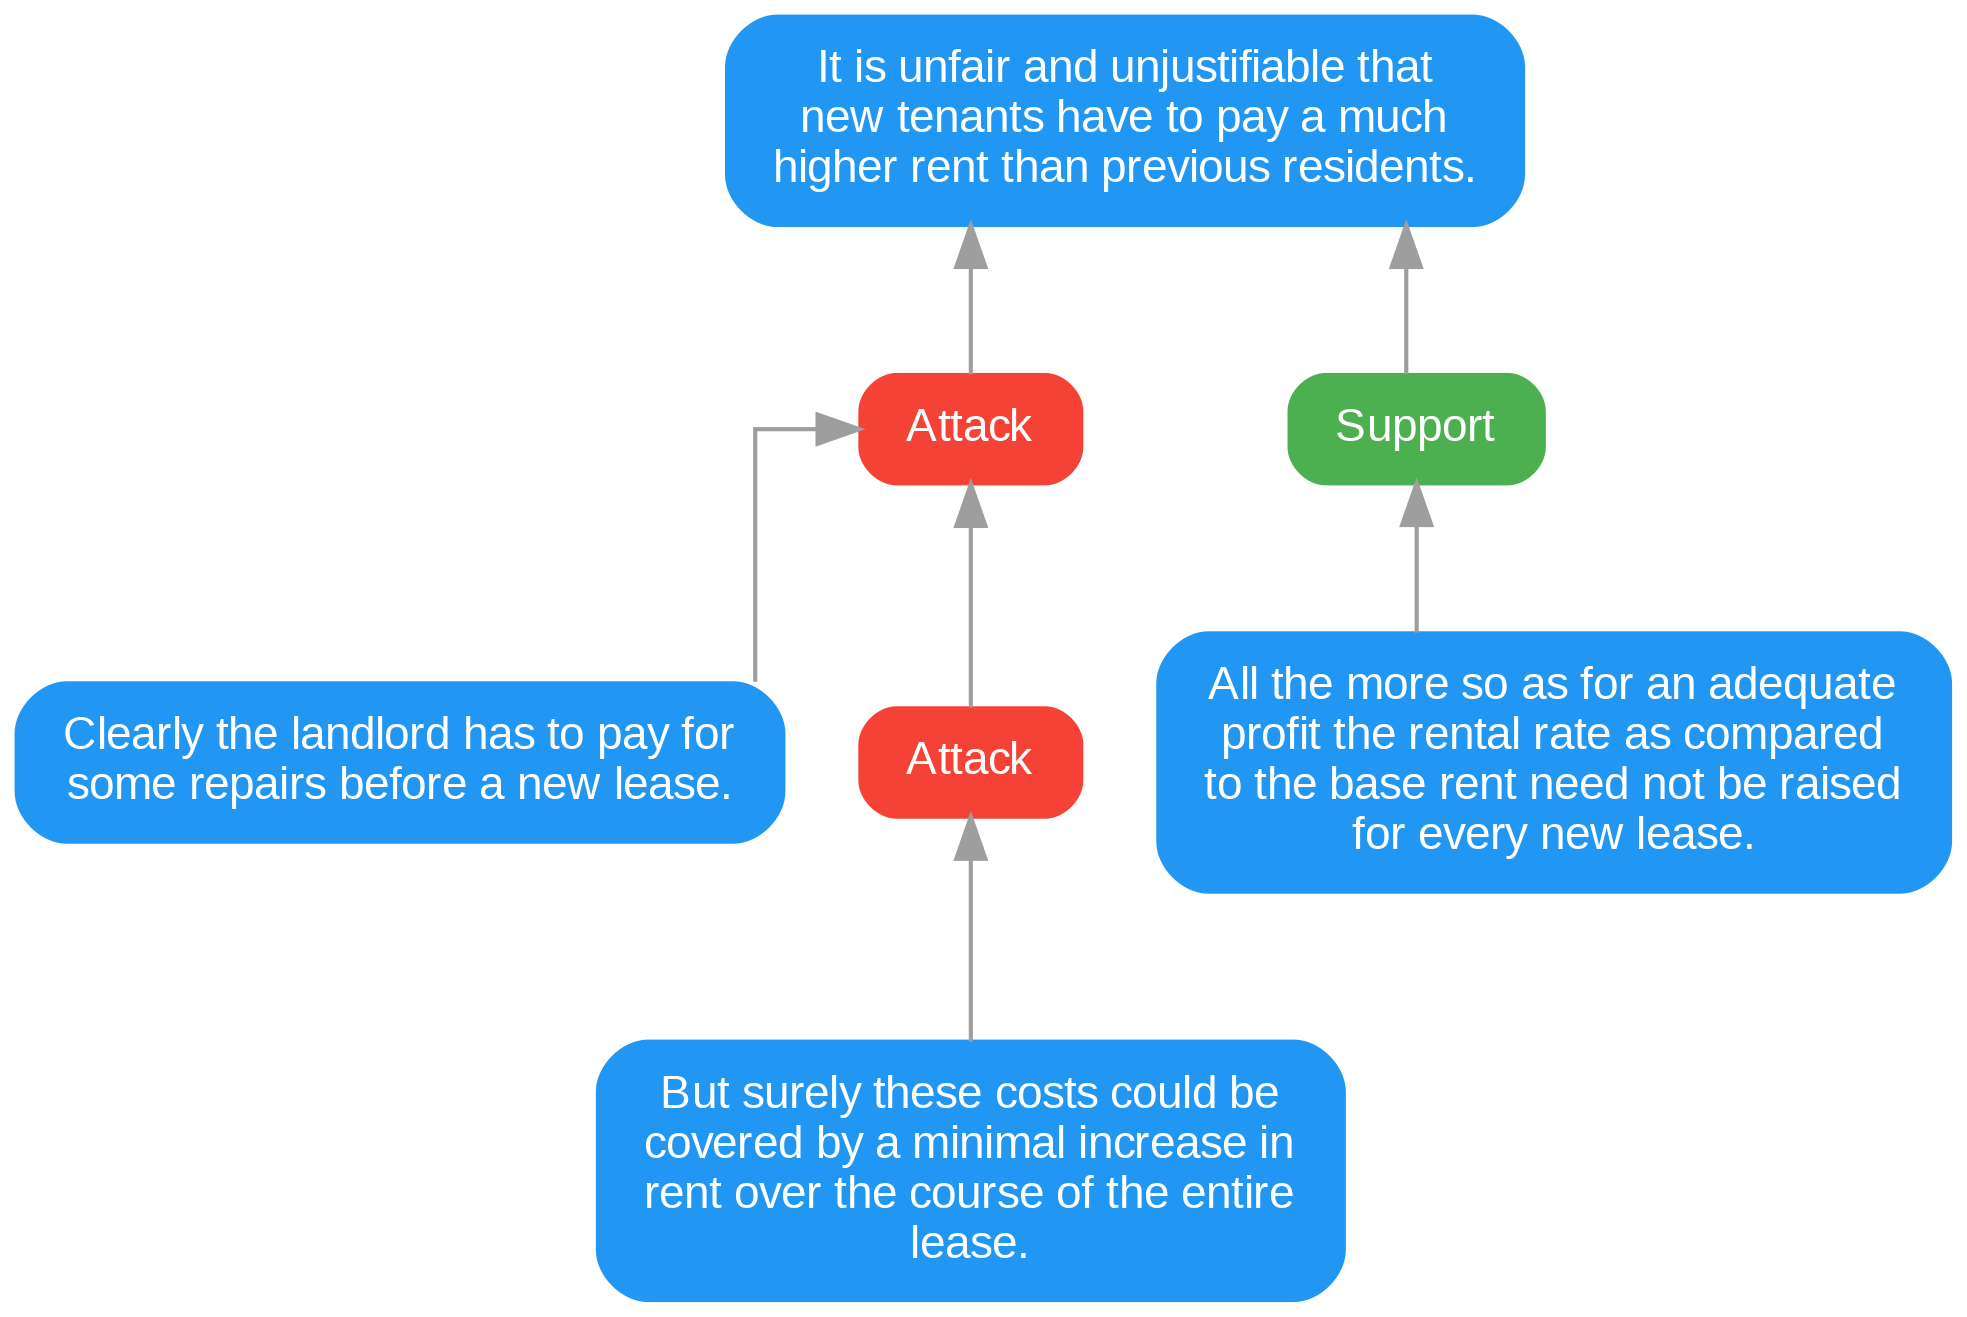

In [2]:
import arguebuf as ab
from PIL import Image
testgraph = ab.load.file("./graphs/microtexts/nodeset6369.json")
ab.render.graphviz(ab.dump.graphviz(testgraph), "testgraph.png")
Image.open("testgraph.png")

[{'x': 0, 'y': 0, 'width': 85, 'height': 256, 'depth': 0}, {'x': 85, 'y': 0, 'width': 85, 'height': 256, 'depth': 0}, {'x': 85, 'y': 0, 'width': 85, 'height': 256, 'depth': 1}, {'x': 170, 'y': 0, 'width': 85, 'height': 256, 'depth': 0}]


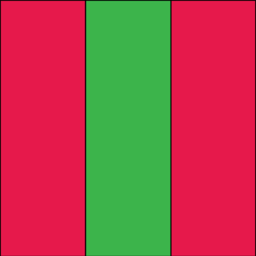

In [8]:
from make_treemap_Inodes import visualize_treemap, standard_resize, get_treemap_rects, build_tree
from PIL import Image
import arguebuf as ab
visualize_treemap("./graphs/microtexts/nodeset6361.json", "testmap_old.png")
g = ab.load.file("./graphs/microtexts/nodeset6361.json")
tree = build_tree(g, [node for node in g.nodes.values() if len(g.outgoing_edges(node)) == 0][0])
print(get_treemap_rects(tree, 0, 0, 256, 256, True))
standard_resize("testmap_old.png")
Image.open("testmap_old.png")

In [2]:
source_nodes = [node for node in testgraph.nodes.values() if len(testgraph.outgoing_edges(node)) == 0]
    
    # build tree
tree = build_tree(testgraph, testgraph.major_claim) if testgraph.major_claim else build_tree(testgraph, source_nodes[0])
tree

NameError: name 'build_tree' is not defined

In [ ]:
def get_treemap_rects(tree, x, y, width, height, horizontal, depth=0) -> list:
    parts = len(tree["children"])
    if parts == 0:
        return [{"x": x, "y": y, "width": width, "height": height, "depth": depth, "label": tree["label"]}]
    own_width = width
    own_height = 0.1 * height
    children_width = width // parts if horizontal else width
    children_height = height * 0.9 // parts if not horizontal else height
    res = [{"x": x, "y": y, "width": own_width, "height": own_height, "depth": depth, "label": tree["label"]}] if "label" in tree else []
    y += own_height
    for i, child in enumerate(tree["children"]):
        if horizontal:
            child_x = x + i * children_width
            child_y = y
        else:
            child_x = x
            child_y = y + i * children_height
        res.append({"x": child_x, "y": child_y, "width": children_width, "height": children_height, "depth": depth, "label": child["label"] if "label" in child else None})
        res += get_treemap_rects(child, child_x, child_y, children_width, children_height, not horizontal, depth+1)
    return res

128.0 256
12.8 256 115.2 256.0


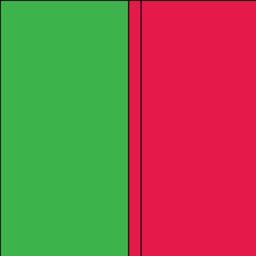

In [3]:
from make_treemap_Snodes import visualize_treemap, standard_resize
visualize_treemap("./graphs/microtexts/nodeset6369.json", "testmap.png")
standard_resize("testmap.png")
Image.open("testmap.png")

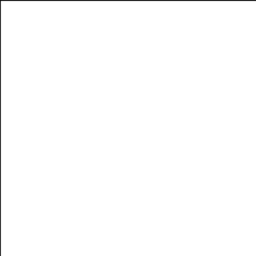

In [5]:
visualize_treemap("./retrieval_queries/microtexts-retrieval-simple/death1.json", "testquerytreemap.png")
standard_resize("testquerytreemap.png")
Image.open("testquerytreemap.png")

256.0 256
25.6 256 230.4 128.0


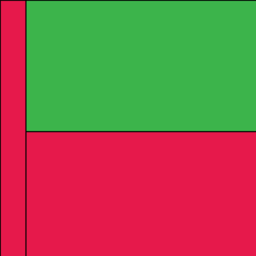

In [4]:
from make_treemap_Snodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects
from PIL import Image
import arguebuf as ab
visualize_treemap("./graphs/microtexts/nodeset6361.json", "testmap.png")
standard_resize("testmap.png")
Image.open("testmap.png")

256 25.6 256.0 230.4
25.6 230.4 230.4 115.2
[{'x': 0, 'y': 0, 'width': 256, 'height': 25.6, 'depth': 0, 'label': 'Support'}, {'x': 0.0, 'y': 25.6, 'width': 25.6, 'height': 230.4, 'depth': 1, 'label': 'Attack'}, {'x': 25.6, 'y': 25.6, 'width': 230.4, 'height': 115.2, 'depth': 2, 'label': 'Support'}, {'x': 25.6, 'y': 140.8, 'width': 230.4, 'height': 115.2, 'depth': 2, 'label': 'Attack'}]
256 25.6 256.0 230.4
25.6 230.4 230.4 115.2


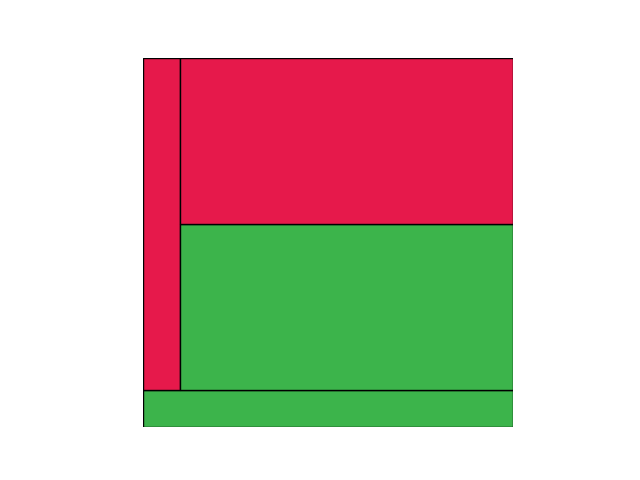

In [2]:
import arguebuf as ab
from PIL import Image
g = ab.Graph()
s1 = ab.SchemeNode(ab.Support.DEFAULT)
s2 = ab.SchemeNode(ab.Attack.DEFAULT)
s3 = ab.SchemeNode(ab.Support.DEFAULT)
s4 = ab.SchemeNode(ab.Attack.DEFAULT)
s5 = ab.SchemeNode(ab.Attack.DEFAULT)
s6 = ab.SchemeNode(ab.Attack.DEFAULT)

g.add_edge(ab.Edge(s2, s1))
g.add_edge(ab.Edge(s3, s2))
g.add_edge(ab.Edge(s4, s2))
# g.add_edge(ab.Edge(s5, s4))
# g.add_edge(ab.Edge(s6, s4))
from make_treemap_Snodes import visualize_treemap_inmem, standard_resize, get_treemap_rects, build_tree, _get_children
tree = build_tree(g, s1)
print(get_treemap_rects(tree, 0, 0, 256, 256, True)) 
visualize_treemap_inmem(g, "testmap_1.png")
# standard_resize("testmap_1.png")
Image.open("testmap_1.png")


In [1]:
from make_treemap_Snodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects
from PIL import Image
import arguebuf as ab
# visualize_treemap("./graphs/microtexts/nodeset6361.json", "testmap.png")
# standard_resize("testmap.png")
# Image.open("testmap.png")
graph = ab.load.file("./graphs/microtexts/nodeset6369.json")
mj = [node for node in graph.nodes.values() if len(graph.outgoing_edges(node)) == 0][0]
print(mj)
tree = build_tree(graph, mj)
print(tree)
rects = get_treemap_rects(tree, 0, 0, 256, 256, True)
rects

119997
{'children': [{'id': '120001', 'label': 'Attack', 'children': [{'id': '120002', 'label': 'Attack', 'children': []}]}, {'id': '120003', 'label': 'Support', 'children': []}]}
128.0 256
12.8 256 115.2 256.0


[{'x': 0.0,
  'y': 0,
  'width': 12.8,
  'height': 256,
  'depth': 1,
  'label': 'Attack'},
 {'x': 12.8,
  'y': 0.0,
  'width': 115.2,
  'height': 256.0,
  'depth': 2,
  'label': 'Attack'},
 {'x': 128.0,
  'y': 0,
  'width': 128.0,
  'height': 256,
  'depth': 1,
  'label': 'Support'}]

In [17]:
# snodes, retrieval complex files
from glob import glob
from tqdm import tqdm
from make_treemap_Snodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects

for filename in tqdm(glob("./retrieval_queries/microtexts-retrieval-complex/*.json")):
    result_path = f"treemaps_eval/queries-complex_snodes/{filename.split('/')[-1].replace('.json', '.png')}"
    visualize_treemap(filename, result_path)
    standard_resize(result_path)
for filename in tqdm(glob("./graphs/microtexts/*.json")):
    result_path = f"treemaps_eval/casebase_snodes/{filename.split('/')[-1].replace('.json', '.png')}"
    visualize_treemap(filename, result_path)
    standard_resize(result_path)

100%|██████████| 110/110 [00:03<00:00, 32.57it/s]


In [21]:
# inodes, retrieval simple files
from glob import glob
from tqdm import tqdm
from make_treemap_Inodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects

for filename in tqdm(glob("./retrieval_queries/microtexts-retrieval-simple/*.json")):
    result_path = f"treemaps_eval/queries/{filename.split('/')[-1].replace('.json', '.png')}"
    visualize_treemap(filename, result_path)
    standard_resize(result_path)
for filename in tqdm(glob("./graphs/microtexts/*.json")):
    result_path = f"treemaps_eval/casebase/{filename.split('/')[-1].replace('.json', '.png')}"
    visualize_treemap(filename, result_path)
    standard_resize(result_path)

100%|██████████| 110/110 [00:03<00:00, 34.08it/s]


In [11]:
from make_treemap_Snodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects
graph = ab.load.file("./retrieval_queries/microtexts-retrieval-simple/death2.json")
mj = [node for node in graph.nodes.values() if len(graph.outgoing_edges(node)) == 0][0]
tree = build_tree(g, mj)
print(tree)
rects = get_treemap_rects(tree, 0, 0, 256, 256, True)
rects



{'children': [{'id': '276996', 'label': 'Support', 'children': []}]}


[{'x': 0, 'y': 0, 'width': 256, 'height': 256, 'depth': 1, 'label': 'Support'}]

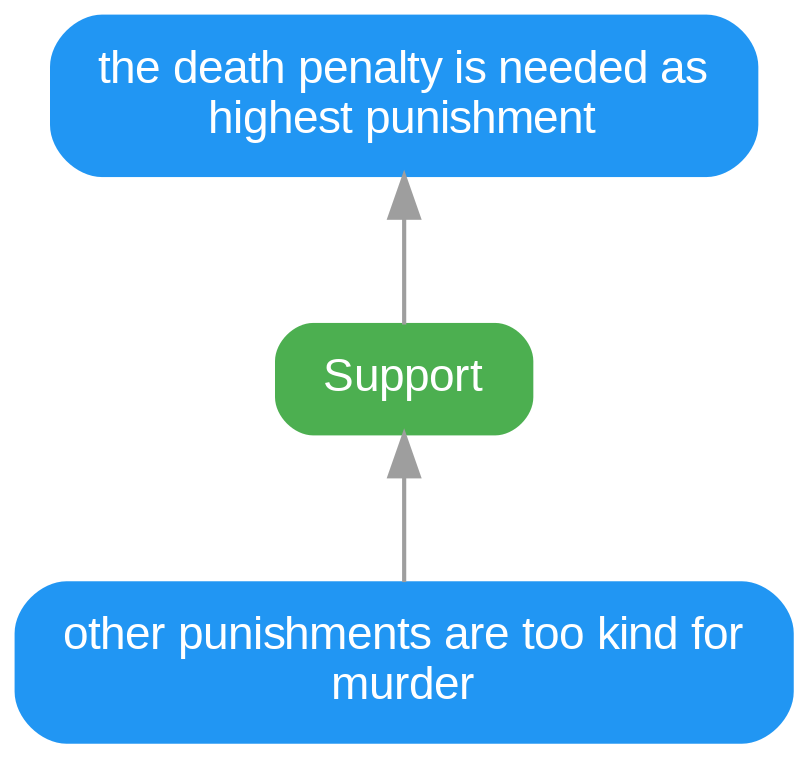

In [9]:
import arguebuf as ab
from PIL import Image
testgraph = ab.load.file("./retrieval_queries/microtexts-retrieval-simple/death2.json")
ab.render.graphviz(ab.dump.graphviz(testgraph), "testgraph3.png")
Image.open("testgraph3.png")

In [13]:
from glob import glob
import arguebuf as ab
graph_files = glob("./graphs/**/*.json")
from random import shuffle
shuffle(graph_files)
for filename in graph_files:
    graph = ab.load.file(filename)
    s_nodes = [node for node in graph.nodes.values() if isinstance(node, ab.SchemeNode)]
    if len(s_nodes) > 7 and len(s_nodes) < 15:
        print(filename)
        break

./graphs/us-2016/nodeset10592.json


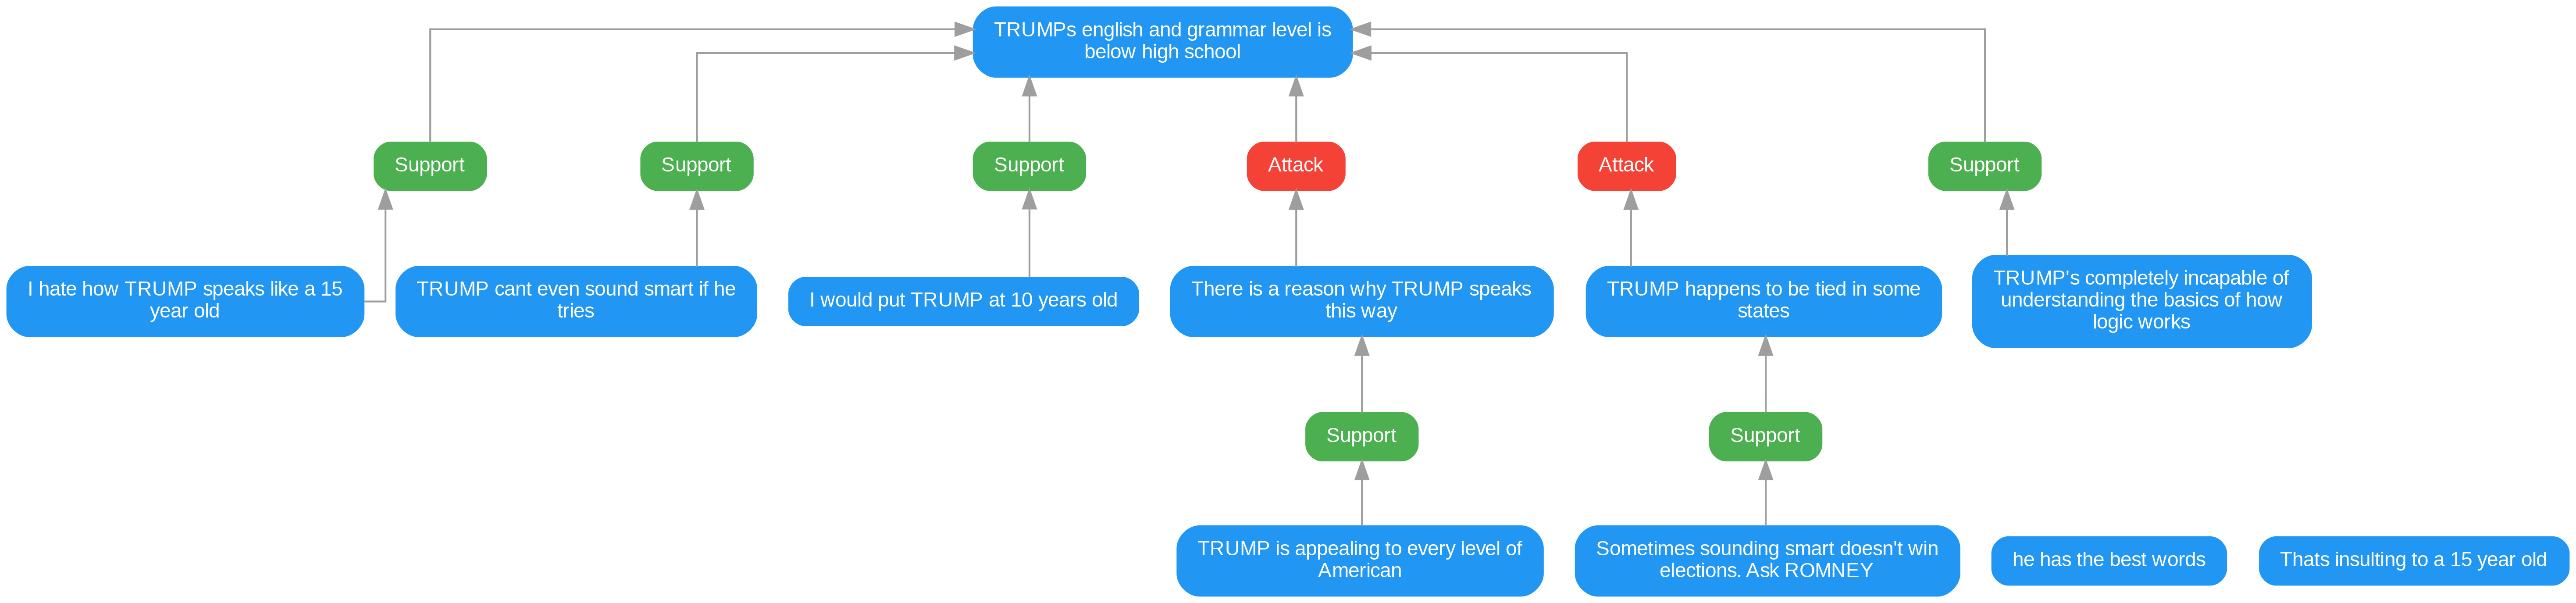

In [14]:
import arguebuf as ab
from PIL import Image
testgraph = ab.load.file("./graphs/us-2016/nodeset10592.json")
ab.render.graphviz(ab.dump.graphviz(testgraph), "testgraph4.png")
Image.open("testgraph4.png")

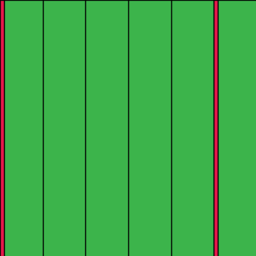

In [15]:
from make_treemap_Snodes import visualize_treemap, standard_resize, build_tree, get_treemap_rects
from PIL import Image
import arguebuf as ab
visualize_treemap("./graphs/us-2016/nodeset10592.json", "testmap.png")
standard_resize("testmap.png")
Image.open("testmap.png")